## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/mouse_metadata.csv"
study_results_path = "../Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
#GoodReadsSummary
mouse_count = len(combined_study_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#check for duplicates that have the same Mouse ID and Timepoint
#ReadingWritingCSV

#checks for rows value counts based on mouse id
combined_study_df["Mouse ID"].value_counts()

g989    13
u327    10
f545    10
i334    10
l661    10
        ..
t573     1
o848     1
v199     1
h428     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#checking extra data values from sample mouse (portland_crimedata)
row_info = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]
row_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse = combined_study_df.loc[(combined_study_df["Mouse ID"] != "g989")]
cleaned_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_check = cleaned_mouse["Mouse ID"].value_counts()
print(clean_check)

u327    10
v991    10
e584    10
a685    10
a411    10
        ..
t573     1
o848     1
v199     1
h428     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64


<h2>Timepoint Charts</h2>

In [8]:
#mouse id's with 10 timepoints
mouse_count = cleaned_mouse.groupby(["Mouse ID"]).count()
ten_count = mouse_count.loc[(mouse_count["Timepoint"]== 10)]
ten_count.reset_index(inplace=True)
mouse_list = ten_count["Mouse ID"].to_list()
mouse_df = pd.DataFrame({"Mouse ID": mouse_list})
mouse_df

,Mouse ID
0,a203
1,a251
2,a262
3,a275
4,a401
...,...
125,y865
126,z578
127,z581
128,z795


<h5> Of the 249 mice used to conduct the study, measurements at each of the 10 recorded timepoints were attained for 130. </h5>

In [9]:
#dataframe of ten timepoints for each mouse ID
merge_tp_df = pd.merge(mouse_df, cleaned_mouse, on=["Mouse ID"], how="left")
merge_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1295,z969,Naftisol,Male,9,30,25,63.145652,2
1296,z969,Naftisol,Male,9,30,30,65.841013,3
1297,z969,Naftisol,Male,9,30,35,69.176246,4
1298,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
#mean to attain average tumor volume at each timepoint for each drug regimen
two_groups = merge_tp_df.groupby(['Drug Regimen', 'Timepoint'])
two_groups_df = two_groups.mean()
two_groups_df.reset_index(inplace=True)
two_groups_df

,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,12.809524,19.857143,45.000000,0.000000
1,Capomulin,5,12.809524,19.857143,44.638812,0.190476
2,Capomulin,10,12.809524,19.857143,43.288693,0.380952
3,Capomulin,15,12.809524,19.857143,42.241369,0.428571
4,Capomulin,20,12.809524,19.857143,41.046149,0.714286
...,...,...,...,...,...,...
95,Zoniferol,25,13.071429,27.571429,55.315109,1.785714
96,Zoniferol,30,13.071429,27.571429,57.520661,2.000000
97,Zoniferol,35,13.071429,27.571429,60.089372,2.285714
98,Zoniferol,40,13.071429,27.571429,62.916692,2.785714


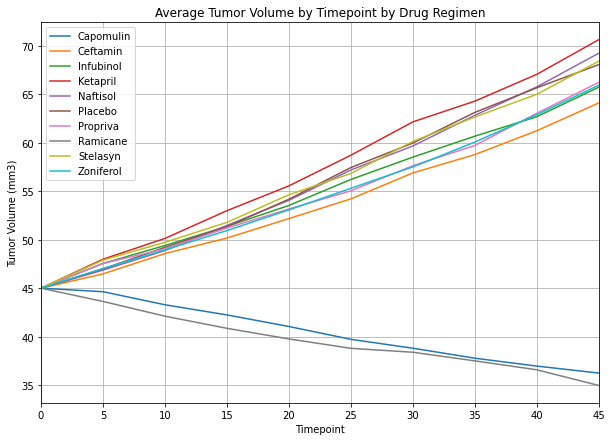

In [208]:
#sorting dataframe for each drug regimen to attain plot points
capomulin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Capomulin"]
ceftamin = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ceftamin"]
infubinol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Infubinol"]
ketapril = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ketapril"]
naftisol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Naftisol"]
placebo = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Placebo"]
propriva = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Propriva"]
ramicane = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Ramicane"]
stelasyn = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Stelasyn"]
zoniferol = two_groups_df.loc[two_groups_df["Drug Regimen"] == "Zoniferol"]

# Setting plot points(x,y) and label for each Drug Regimen
plt.figure(figsize=(10,7))
capomulin_x = capomulin["Timepoint"]
capomulin_y = capomulin["Tumor Volume (mm3)"]
plt.plot(capomulin_x, capomulin_y, label = "Capomulin")

ceftamin_x = ceftamin["Timepoint"]
ceftamin_y = ceftamin["Tumor Volume (mm3)"]
plt.plot(ceftamin_x, ceftamin_y, label = "Ceftamin")

infubinol_x = infubinol["Timepoint"]
infubinol_y = infubinol["Tumor Volume (mm3)"]
plt.plot(infubinol_x, infubinol_y, label = "Infubinol")

ketapril_x = ketapril["Timepoint"]
ketapril_y = ketapril["Tumor Volume (mm3)"]
plt.plot(ketapril_x, ketapril_y, label = "Ketapril")

naftisol_x = naftisol["Timepoint"]
naftisol_y = naftisol["Tumor Volume (mm3)"]
plt.plot(naftisol_x, naftisol_y, label = "Naftisol")

placebo_x = placebo["Timepoint"]
placebo_y = placebo["Tumor Volume (mm3)"]
plt.plot(placebo_x, placebo_y, label = "Placebo")

propriva_x = propriva["Timepoint"]
propriva_y = propriva["Tumor Volume (mm3)"]
plt.plot(propriva_x, propriva_y, label = "Propriva")

ramicane_x = ramicane["Timepoint"]
ramicane_y= ramicane["Tumor Volume (mm3)"]
plt.plot(ramicane_x, ramicane_y, label = "Ramicane")

stelasyn_x = stelasyn["Timepoint"]
stelasyn_y= stelasyn["Tumor Volume (mm3)"]
plt.plot(stelasyn_x, stelasyn_y, label = "Stelasyn")

zoniferol_x = zoniferol["Timepoint"]
zoniferol_y = zoniferol["Tumor Volume (mm3)"]
plt.plot(zoniferol_x, zoniferol_y, label = "Zoniferol")


#Plot Labels
plt.xlabel('Timepoint')
# Set the y axis label of the current axis.
plt.ylabel('Tumor Volume (mm3)')
# Set a title of the current axes.
plt.title('Average Tumor Volume by Timepoint by Drug Regimen')
# show a legend on the plot
plt.legend()
plt.xlim(0,45)
# Display a figure.
plt.grid()

<h5>Prescribed drug regimen on mouse tumor volume has shown effectiveness in treatments of Capomulin and Ramicane, as displayed here with an overall consecutive decrease in tumor size at each measured timepoint.</h5>

<h2>Quartile B&W</h2>

In [12]:
# Collect greatest timepoint for each mouse 
grouped_mouse = cleaned_mouse.groupby(["Mouse ID"])
tp_mouse = pd.DataFrame(grouped_mouse["Timepoint"].max())
tp_mouse.head(10)

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
a401,45
a411,45
a444,45
a457,10


In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(tp_mouse, cleaned_mouse, on=["Timepoint", "Mouse ID"], how="left")
merge_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

for drug in drug_regimens:
    final_tumor_vol = merge_df.loc[merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    tumor_vol.append(final_tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug_regimens}'s potential outliers: {outliers}")

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']'s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
['Capo

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 720x504 with 0 Axes>

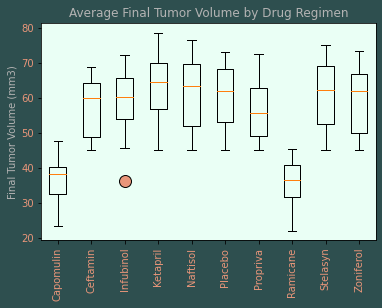

In [221]:
# Generate a box plot of the final tumor volume average of each mouse across ten regimens 
drug_out = dict(markerfacecolor='darksalmon',markersize=12)
plt.figure(figsize=(10,7))
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
ax.set_facecolor('#eafff5')
plt.boxplot(tumor_vol, labels = drug_regimens,flierprops=drug_out)
plt.title('Average Final Tumor Volume by Drug Regimen', color='0.7')
plt.ylabel('Final Tumor Volume (mm3)', color='0.7')
plt.xticks(rotation=90)
ax.tick_params(labelcolor='darksalmon')
plt.show()

In [88]:
#group by unique mouse, drug regimen
count_mouse = cleaned_mouse.groupby(["Mouse ID", "Drug Regimen","Sex"])
count = count_mouse.count()
mouse_count_df = pd.DataFrame(count)
mouse_count_df

,,,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,Drug Regimen,Sex,,,,,
a203,Infubinol,Female,10,10,10,10,10
a251,Infubinol,Female,10,10,10,10,10
a262,Placebo,Female,10,10,10,10,10
a275,Ceftamin,Female,10,10,10,10,10
a366,Stelasyn,Female,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,Propriva,Female,3,3,3,3,3
z578,Ramicane,Male,10,10,10,10,10
z581,Infubinol,Female,10,10,10,10,10


In [89]:
#reset index
mouse_count_df.reset_index(inplace=True)
mouse_count_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,10,10,10,10,10
1,a251,Infubinol,Female,10,10,10,10,10
2,a262,Placebo,Female,10,10,10,10,10
3,a275,Ceftamin,Female,10,10,10,10,10
4,a366,Stelasyn,Female,7,7,7,7,7
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,3,3,3,3,3
244,z578,Ramicane,Male,10,10,10,10,10
245,z581,Infubinol,Female,10,10,10,10,10
246,z795,Naftisol,Female,10,10,10,10,10


In [90]:
#group by drug regimen counts
count_drug = mouse_count_df.groupby(["Drug Regimen", "Sex"])
count_2 = count_drug.count()
drug_count_df = pd.DataFrame(count_2)
drug_count_df.reset_index(inplace=True)
drug_count_df

,Drug Regimen,Sex,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,Female,13,13,13,13,13,13
1,Capomulin,Male,12,12,12,12,12,12
2,Ceftamin,Female,13,13,13,13,13,13
3,Ceftamin,Male,12,12,12,12,12,12
4,Infubinol,Female,12,12,12,12,12,12
5,Infubinol,Male,13,13,13,13,13,13
6,Ketapril,Female,9,9,9,9,9,9
7,Ketapril,Male,16,16,16,16,16,16
8,Naftisol,Female,13,13,13,13,13,13
9,Naftisol,Male,12,12,12,12,12,12


In [109]:
male_count = drug_count_df.loc[drug_count_df["Sex"] == "Male", :]
m_count= male_count["Mouse ID"].to_list()
female_count = drug_count_df.loc[drug_count_df["Sex"] == "Female", :]
f_count = female_count["Mouse ID"].to_list()
print(m_count)
print(f_count)

[12, 12, 13, 16, 12, 12, 13, 16, 9, 10]
[13, 13, 12, 9, 13, 13, 11, 9, 15, 15]


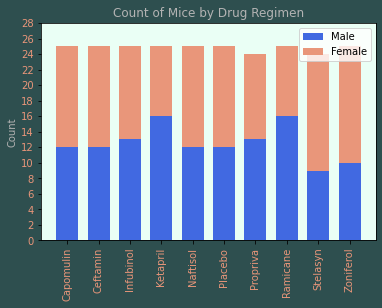

<Figure size 432x288 with 0 Axes>

In [225]:
labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
N=10
ind = np.arange(N)
width = .70
fig, ax = plt.subplots(facecolor=(.18, .31, .31))
ax.set_facecolor('#eafff5')
ax.bar(ind, m_count, width, color ="royalblue")
ax.bar(ind, f_count, width, color ="darksalmon", bottom=m_count)
ax.set_ylabel('Count', color='0.7')
ax.set_title("Count of Mice by Drug Regimen", color='0.7', )
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation=90 )
ax.set_yticks(np.arange(0, 30, 2))
ax.tick_params(labelcolor='darksalmon')
ax.legend(labels=['Male', 'Female'])
plt.show()

plt.savefig("img2.png")